In [8]:
import random
import timeit
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.special
import math    


def  busquedaBinaria(A ,query):
    mitad = math.floor(len(A)/2)
    if(len(A) == 1 and A[0]!= query):
        return -1
    if(A[mitad] == query):
        return A[mitad]
    if(query > A[mitad]):
        return (busquedaBinaria(A[mitad:len(A)],query))
    else:
        return (busquedaBinaria(A[0:mitad],query))
    
def busquedaTernaria(A, query):
    mitadTernaria = math.floor(len(A)/3)
    n = len(A)
    if n < 3:
        return busquedaSecuencial(A,query)
    else:
        if query < A[(mitadTernaria -1)]:
            return busquedaTernaria(A[0:mitadTernaria],query)
        else: 
            if query < A[(math.floor(len(A)*(2/3)))-1]:
                return busquedaTernaria(A[mitadTernaria:math.floor(len(A)*(2/3))],query)
            else:
                return busquedaTernaria(A[math.floor(len(A)*(2/3)):len(A)],query)
    
def busquedaSecuencial(A,query):
    l = len(A)
    n = 0
    res = -1
    print()
    while l != n:
        if A[n] == query:
            res = A[n]
            break
        else:
            n = n+1
    return res    
    

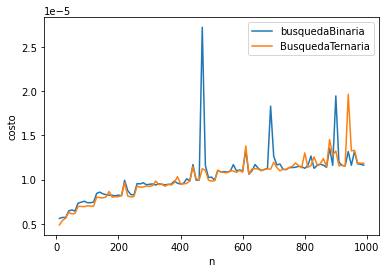

In [9]:
n_min = 10
n_max = 1000
st = 10
iteraciones = 10 # iteraciones del benchmark

t_busquedaBinaria_1 =  list()
for n in range(n_min, n_max, st):
    suma = 0
    for i in range(1, iteraciones):
        v = random.sample(range(1, 1000000), n)
        v.sort()
        suma += timeit.timeit(lambda: busquedaBinaria(v,10000000), number = 1)
    promedio = suma / iteraciones  
    t_busquedaBinaria_1.append(promedio)
    
t_busquedaTernaria_1 =  list()
for n in range(n_min, n_max, st):
    suma = 0
    for i in range(1, iteraciones):
        v = random.sample(range(1, 1000000), n)
        v.sort()
        suma += timeit.timeit(lambda: busquedaBinaria(v,10000000), number = 1)
    promedio = suma / iteraciones  
    t_busquedaTernaria_1.append(promedio)
    
    
eje_x = list(range(n_min, n_max, st))
plt.plot(eje_x, t_busquedaBinaria_1, label = 'busquedaBinaria')
plt.xlabel('n')
plt.ylabel('costo')
plt.plot(eje_x, t_busquedaTernaria_1, label = 'BusquedaTernaria')
plt.legend()
